<h1 align="center"> Principle Component Analysis (PCA) for Data Visualization </h1>

## Esteban Martínez Valverde - Reconocimiento de Patrones

## Tecnológico de Costa Rica - Maestría en Electrónica

## Tema: Análisis simple de la medición de pobreza

Dataset: https://www.kaggle.com/ambarish/kiva-data-analysis-w-naive-poverty-metric

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load MPI National Labeled Dataset

In [9]:
url = "https://raw.githubusercontent.com/Minimal88/Tarea1_RecPatrones/master/data/MPI_national_labeled.csv"

In [10]:
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['ISO','Country','MPI Urban','Headcount Ratio Urban','Intensity of Deprivation Urban','MPI Rural','Headcount Ratio Rural','Intensity of Deprivation Rural','Nivel'])

In [11]:
df.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,Nivel
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3,Nivel_1
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3,Nivel_1
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1,Nivel_1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7,Nivel_1
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9,Nivel_1


In [12]:
features = ['MPI Urban','Headcount Ratio Urban','Intensity of Deprivation Urban','MPI Rural','Headcount Ratio Rural','Intensity of Deprivation Rural']
# Separating out the features
x = df.loc[:, features].values

In [13]:
# Separating out the target
y = df.loc[:,['Nivel']].values

In [14]:
#Standarize Data
x = StandardScaler().fit_transform(x)

In [15]:
pd.DataFrame(data = x, columns = features).head()

,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,-0.840300,-0.913202,-1.639400,-1.072205,-1.206570,-1.547421
1,-0.840300,-0.907769,-0.054480,-1.062216,-1.194186,-0.746509
2,-0.840300,-0.907769,-0.289283,-1.057222,-1.188145,-1.112640
3,-0.840300,-0.907769,-1.189361,-1.012271,-1.113237,-0.929575
4,-0.829574,-0.902337,-1.639400,-1.067211,-1.197508,-1.135524


In [16]:
# Apply PCA projection in 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
	, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Nivel']]], axis = 1)

In [17]:
finalDf.head(5)

,principal component 1,principal component 2,Nivel
0,-2.940579,0.535639,Nivel_1
1,-1.973066,0.005235,Nivel_1
2,-2.211200,0.183007,Nivel_1
3,-2.444252,0.179670,Nivel_1
4,-2.757769,0.371897,Nivel_1


In [18]:
df[['Nivel']].head()

,Nivel
0,Nivel_1
1,Nivel_1
2,Nivel_1
3,Nivel_1
4,Nivel_1


In [19]:
finalDf = pd.concat([principalDf, df[['Nivel']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Nivel
0,-2.940579,0.535639,Nivel_1
1,-1.973066,0.005235,Nivel_1
2,-2.211200,0.183007,Nivel_1
3,-2.444252,0.179670,Nivel_1
4,-2.757769,0.371897,Nivel_1


## Visualize 2D Projection

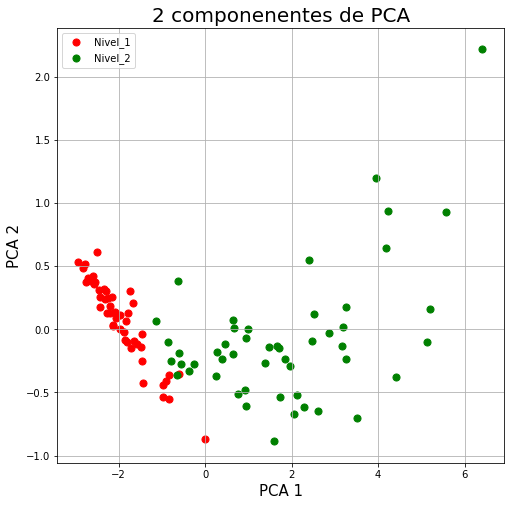

In [20]:
#Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
ax.set_title('2 componenentes de PCA', fontsize = 20)
countries = ['Nivel_1', 'Nivel_2']
colors = ['r', 'g', 'b']
for country, color in zip(countries,colors):
    indicesToKeep = finalDf['Nivel'] == country
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(countries)
ax.grid()
plt.show()

In [21]:
#The explained variance measures the quantity of information (variance) can be attributed to each of the principal components.
pca.explained_variance_ratio_

array([0.93203761, 0.03273626])

Together, the two principal components contain 96.47% of the information. The first principal component contains 93.20% of the variance and the second principal component contains 3.27% of the variance. 